## Introduction

This notebook presents the architecture of <b> UnADevs </b> Method: Unbounded Unsupervised Activity Discovery using the Temporal Behaviour Assumption. 

The method is based on online clustering, and additinally includes the temporal information of the occuring activities. Therefore, it is able to discover clusters of repating/periodic activities as the occur and additionally keeps track of the time interval of the discovered cluster. This way, the system may prompt the user about the discovered activity with the appropriate time interval and ask for feedback. 

The detailed description of the algorithm is in the paper "Unsupervised Online Activity Discovery Using Temporal Behaviour Assumption". [1]

More information about the projet: http://www.sussex.ac.uk/strc/research/wearable/research-ll

The following code is an example clustering and visualization of Subject 1 from the JSI-ADL dataset [2][3]. It corresponds to the visualization shown with Figure 2 in the ISWC paper [1].
<ul>
<li>[1] H. Gjoreski, D. Roggen. Unsupervised Online Activity Discovery Using Temporal Behaviour Assumption. In: 21th International Symposium Wearable Computers (ISWC) 2017, 11-15 September 2017, Maui, Hawaii, USA
<li>[2] H. Gjoreski et al. “Context-based ensemble method for human energy expenditure estimation”. Appl. Soft Comput., vol. 37, pp. 960–970, 2015.
<li>[3] B. Cvetković, R. Milić, and M. Luštrek, “Estimating Energy Expenditure with Multiple Models using Different Wearable Sensors,” IEEE J. Biomed. Heal. informatics, vol. 20, 2016.

## Setup

In [5]:
import time
import numpy as np
import Online_temporal_clustering_JSI_release as OTC
import Utilities_JSI_release as Util
from sklearn.preprocessing import scale
###########################################
# parameters
np.random.seed(2)

tolerance = 22
activePool = 3
minDur = 16

OTC.deltaT = tolerance #bigger number bigger clusters, tends to combine small clusters with big ones
OTC.memoryDelta = tolerance +1 #bigger number smaller clusters, lots of empty space... only sure clusters
OTC.num_clusterss = activePool #bigger number scattered clusters, lots of empty space... if you increase this, also increase the memory parameters
OTC.threshold_cluster_size = minDur

## Data

The data from Subject 1 from the JSI_ADL dataset is used. In this example, we use the already extracted features. We also provide the dataprocessing code (segmentation, feature extraction) in the "Preprocessing" folder.

In [6]:
# Load the data (features already extracted)
# data Format: [timestamp, f1, f2, f3, ... fn, label]
data_features = np.loadtxt('data_JSI/data_features_1.csv', delimiter=';')
features_list = [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24]
data_features = sorted(data_features, key=lambda a_entry: a_entry[0])
data_array = np.array(data_features)

# Select features
data_array[:, features_list] = scale(data_array[:, features_list])
dataAll = np.column_stack((data_array[:, [3, 5]], data_array[:, 0], data_array[:, -1]))

points = data_array[:, features_list]
timestamps = dataAll[:, [2]]
n = len(points)
start = time.time()

## Clustering

In [7]:
# Perform the clustering
c = OTC.OnlineCluster(OTC.num_clusterss)
for ind1, point in enumerate(points):
    c.cluster(point, timestamps[ind1])
clusters = c.trimclusters()
n_clusters_ = len(clusters)
print "Clustered %d points in %.2f seconds and found %d clusters." % (n, time.time() - start, n_clusters_)

Clustered 7123 points in 2.21 seconds and found 28 clusters.


## Validation and Visualization


EVALUATION:
		\Accu	F-meas	Fragmentation
Supervised:	0.79	0.81	1.58823529412
Unsupervised:	0.82	0.86	1.58823529412

Number of not found activities (supervised identification): 5 out of: 18
Number of not found activities (unsupervised discovery ):0 out of: 18


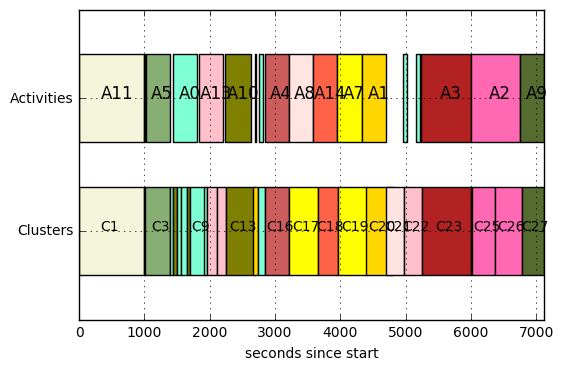

In [8]:
# Validation and Visualization of the clusters
clusters = Util.removeContained(clusters)
data_array2 = Util.remove_small_activities(data_array, dataAll[:, [3]], minDur)
dataAll2 = np.column_stack((data_array2[:, [3, 5]], data_array2[:, 0], data_array2[:, -1]))

activity_means = Util.get_activity_means(np.column_stack((data_array2[:, features_list], data_array2[:, [0, -1]])))
activities_set = list(set(dataAll2[:, [3]].T[0]))
dict_activity_index_colour = dict(zip(activities_set, np.arange(len(activities_set))))  # {1:0, 2:1, 6:2, 32:3}

# find the closest activity to each cluster and assign color
cluster_segments, cluster_segments_complex, cluster_colors_set, cluster_array, ratios = \
    Util.findClosestActivity(clusters, activity_means, dict_activity_index_colour)

#Validate and visualize
confusion_matrix_detailed, hungarian_matrix, result = \
    Util.validation(cluster_colors_set, dataAll, dict_activity_index_colour, activities_set,
                    cluster_segments_complex, True, [], cluster_array, [], n_clusters_,
                    cluster_segments, minDur, True)

## Activities
•	'standing': 0<br>
•	'lying_excercising': 1<br>
•	'walking': 2<br>
•	'cycling': 3<br>
•	'working_pc': 4
•	'sitting': 5<br>
•	'transition': 6<br>
•	'shovelling': 7<br>
•	'washing_dishes': 8<br>
•	'running': 9<br>
•	'allfours_move': 10<br>
•	'lying_back': 11<br>
•	'allfours': 12<br>
•	'kneeling': 13<br>
•	'scrubbing_floor': 14<br>


